In [10]:
import numpy as np

## Formula

$$ v_t = {\beta}_{1} v_{t-1} + (1 - {\beta}_{1})g_t$$
$$ s_t = s_{t-1} + (1 - {\beta}_{2})g_t^2 \odot sgn(g_t^2 - s_{t-1})$$
$$\hat{v}_{t} = \frac{v_t}{1-{\beta}_{1}^t} \; and \; \hat{s}_{t} = \frac{s_t}{1-{\beta}_{2}^t}$$
$$ {g}_t' = \frac {\eta \hat{v}_t}{\sqrt{\hat{s}_t}+\epsilon}$$
$$  x_t\leftarrow x_{t-1} - {g}_t'$$
$$

In [11]:
from lib.NeuralNet import *

In [15]:
def OptimizerYogi(W1,b1,W2,b2,W3,b3,dW1,dB1,dW2,dB2,dW3,dB3,vW1,vb1,vW2,vb2,vW3,vb3,sW1,sb1,sW2,sb2,sW3,sb3,lr,beta1,beta2,t):
    momentum = [vW1,vb1,vW2,vb2,vW3,vb3]
    second_momen = [sW1,sb1,sW2,sb2,sW3,sb3]
    gradient = [dW1,dB1,dW2,dB2,dW3,dB3]
    params = [W1,b1,W2,b2,W3,b3]
    for i in range(6):
        momentum[i] = beta1 * momentum[i] + (1-beta1) * gradient[i]
        g_t2 = np.multiply(gradient[i],gradient[i])
        second_momen[i] = second_momen[i] + (1-beta2) * np.multiply(g_t2,np.sign(g_t2-second_momen[i]))
        v_hat = momentum[i] / (1 - beta1**t)
        s_hat = second_momen[i] / (1 - beta2**t)
        g_t = np.multiply(lr * v_hat,1 / (np.sqrt(s_hat)+1e-6))
        params[i] = params[i] - g_t
    W1,b1,W2,b2,W3,b3 = params
    vW1,vb1,vW2,vb2,vW3,vb3 = momentum
    sW1,sb1,sW2,sb2,sW3,sb3 = second_momen
    return W1,b1,W2,b2,W3,b3,vW1,vb1,vW2,vb2,vW3,vb3,sW1,sb1,sW2,sb2,sW3,sb3
        
def Yogi(W1,b1,W2,b2,W3,b3,S,Y,batch_size=16,lr=1e-4,beta1=0.9,beta2=0.999,epoch=0):
    n_samples = S.shape[0]
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    S,Y = S[idx],Y[idx]
    vW1,vb1,vW2,vb2,vW3,vb3 = np.zeros_like(W1),np.zeros_like(b1),np.zeros_like(W2),np.zeros_like(b2),np.zeros_like(W3),np.zeros_like(b3)
    sW1,sb1,sW2,sb2,sW3,sb3 = np.zeros_like(W1),np.zeros_like(b1),np.zeros_like(W2),np.zeros_like(b2),np.zeros_like(W3),np.zeros_like(b3)
    t = 1
    for i in np.arange(0, n_samples, batch_size):
        begin, end = i, min(i + batch_size, n_samples)
        s,y =  S[begin:end] , Y[begin:end]
        O1,O2,O3 = Forward(W1,b1,W2,b2,W3,b3,s)
        dW1,dB1,dW2,dB2,dW3,dB3 = Backward(W1,b1,W2,b2,W3,b3,s,y,O1,O2,O3,lr)
        W1,b1,W2,b2,W3,b3,vW1,vb1,vW2,vb2,vW3,vb3,sW1,sb1,sW2,sb2,sW3,sb3 = OptimizerYogi(W1,b1,W2,b2,W3,b3,dW1,dB1,dW2,dB2,dW3,dB3,vW1,vb1,vW2,vb2,vW3,vb3,sW1,sb1,sW2,sb2,sW3,sb3,lr,beta1,beta2,t)
        t+=1
    return W1,b1,W2,b2,W3,b3

| TIME:     0.15s | EPOCH:     1 | LOSS: 0.08286309 |
| TIME:     5.46s | EPOCH:    50 | LOSS: 0.05107700 |
| TIME:    10.73s | EPOCH:   100 | LOSS: 0.03482587 |
| TIME:    15.89s | EPOCH:   150 | LOSS: 0.01660029 |
| TIME:    20.96s | EPOCH:   200 | LOSS: 0.00734560 |
| TIME:    26.12s | EPOCH:   250 | LOSS: 0.00567103 |
| TIME:    31.39s | EPOCH:   300 | LOSS: 0.00414387 |
| TIME:    36.68s | EPOCH:   350 | LOSS: 0.00331146 |
| TIME:    42.25s | EPOCH:   400 | LOSS: 0.00226626 |
| TIME:    47.84s | EPOCH:   450 | LOSS: 0.00227848 |
| TIME:    53.44s | EPOCH:   500 | LOSS: 0.00245407 |
| TIME:    59.08s | EPOCH:   550 | LOSS: 0.00123224 |
| TIME:    64.54s | EPOCH:   600 | LOSS: 0.00143913 |
| TIME:    70.05s | EPOCH:   650 | LOSS: 0.00164789 |
| TIME:    75.72s | EPOCH:   700 | LOSS: 0.00106642 |
| TIME:    80.85s | EPOCH:   750 | LOSS: 0.00106187 |
| TIME:    85.87s | EPOCH:   800 | LOSS: 0.00115584 |
| TIME:    90.94s | EPOCH:   850 | LOSS: 0.00105746 |
| TIME:    96.08s | EPOCH:  

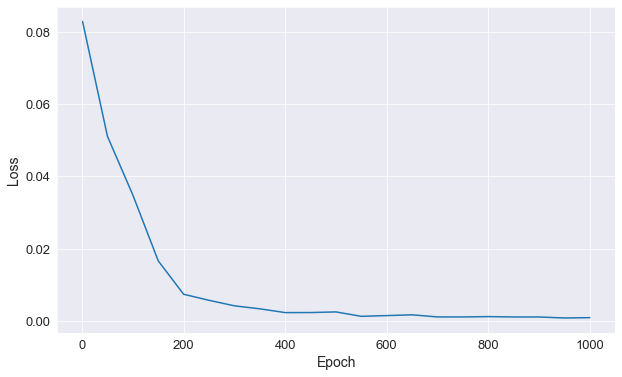

In [16]:
X = np.random.rand(5000,100)
y = np.random.rand(5000,1)
W1,b1,W2,b2,W3,b3 = FitModel(X,y,n_iter=1000,batch_size=500,lr=1e-3,update=Yogi,print_stat=True)